## Pandas DataFrame

In [1]:
import pandas as pd
df = pd.DataFrame([
    ['frank', 'M', 29], 
    ['mary', 'F', 23], 
    ['tom', 'M', 35],
    ['ted', 'M', 33], 
    ['jean', 'F', 21], ['lisa', 'F', 20]]
    )

In [4]:
#print(df)
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df.columns = ['name', 'gender', 'age']

In [7]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [8]:
df.head()

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [9]:
?df.head()

In [10]:
df.head(3)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [11]:
df.tail(3)

,name,gender,age
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   gender  6 non-null      object
 2   age     6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [13]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [14]:
df.dtypes

name      object
gender    object
age        int64
dtype: object

In [15]:
# select name from df
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [17]:
type(df['name'])

pandas.core.series.Series

In [18]:
# select name, age from df
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [20]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [22]:
# select * from df where geder = 'M'
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [24]:
(df['gender'] == 'M') & (df['age'] >=30)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [25]:
# select * from df where gender = 'M' and age >=30
df[(df['gender'] == 'M') & (df['age'] >=30)]

,name,gender,age
2,tom,M,35
3,ted,M,33


In [26]:
# select * from df where gender = 'M' or age >=30
df[(df['gender'] == 'M') | (df['age'] >=30)]

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [27]:
# alter table df add column employee default TRUE
df['employee'] = True

In [28]:
df.head()

,name,gender,age,employee
0,frank,M,29,True
1,mary,F,23,True
2,tom,M,35,True
3,ted,M,33,True
4,jean,F,21,True


In [29]:
del df['employee']

In [30]:
df.head()

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [31]:
df['employee'] = True

In [35]:
# axis =0 : row
# axis =1 : column
# inplace = False: do not take action
# inplace = True: Take action
df.drop('employee', axis = 1, inplace = True)

In [36]:
df.head(3)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [38]:
df['userid'] = range(101,107)

In [39]:
df.head(3)

,name,gender,age,userid
0,frank,M,29,101
1,mary,F,23,102
2,tom,M,35,103


In [41]:
df.set_index('userid', inplace=True)

In [42]:
df.head()

,name,gender,age
userid,,,
101,frank,M,29
102,mary,F,23
103,tom,M,35
104,ted,M,33
105,jean,F,21


In [46]:
# iloc : by location
# loc : by label (index)
df.iloc[ 0 , 0]
df.iloc[0,:]
df.iloc[:,0]
df.iloc[[0,2,4],[0,2]]

,name,age
userid,,
101,frank,29
103,tom,35
105,jean,21


In [47]:
df.loc[[101,102,103],['name', 'age']]

,name,age
userid,,
101,frank,29
102,mary,23
103,tom,35


In [48]:
df.loc[:,['name', 'age']]

,name,age
userid,,
101,frank,29
102,mary,23
103,tom,35
104,ted,33
105,jean,21
106,lisa,20


In [49]:
# select name, age from df where gender = 'M'
df.loc[df['gender'] == 'M',['name', 'age']]

,name,age
userid,,
101,frank,29
103,tom,35
104,ted,33


In [52]:
# select age from df where gender = 'M'
df[df['gender'] == 'M']['age']

df.loc[df['gender'] == 'M', 'age']

userid
101    29
103    35
104    33
Name: age, dtype: int64

In [53]:
df.loc[df['gender'] == 'M', 'age'].mean()

32.333333333333336

In [54]:
df.loc[df['gender'] == 'M', 'age'].median()

33.0

In [55]:
df.loc[df['gender'] == 'F', 'age'].mean()

21.333333333333332

In [56]:
# select gender, AVG(age) from df group by gender
df.groupby(['gender'])['age'].mean()

gender
F    21.333333
M    32.333333
Name: age, dtype: float64

In [57]:
df1= pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'],'C': ['C0', 'C1', 'C2', 'C3'],'D': ['D0', 'D1', 'D2', 'D3']},index=[0,1,2,3])
df2= pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],'B': ['B4', 'B5', 'B6', 'B7'],'C': ['C4', 'C5', 'C6', 'C7'],'D': ['D4', 'D5', 'D6', 'D7']},index=[4,5,6,7])
df3= pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],'B': ['B8', 'B9', 'B10', 'B11'],'C': ['C8', 'C9', 'C10', 'C11'],'D':['D8', 'D9', 'D10', 'D11']},index=[8,9, 10, 11])

In [58]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [59]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [60]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [61]:
# axis = 0, combined by row
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [63]:
# axis = 0, combined by column
pd.concat([df1, df2, df3], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [64]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [65]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [66]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [67]:
# select * from left inner join right on left.key = right.key
pd.merge(left, right, how ='inner', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [68]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [69]:
pd.merge(left, right, how ='inner', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [70]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']},
index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
'D': ['D0', 'D2', 'D3']},
index=['K0', 'K2', 'K3'])


In [71]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [72]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [73]:
# left join by index name
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [74]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/esunpy/master/data/Churn_Modelling.csv')

In [75]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
(df['Exited'] == 1).sum() / len(df)

0.2037

In [81]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [82]:
df['Exited'].value_counts() / len(df)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [84]:
df['Exited'].sum()

2037

In [85]:
# select count(exited) from df group by exited
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

## Pandas Analysis

In [90]:
import pandas_datareader
stocks = pandas_datareader.DataReader(['^TWII', '2330.TW', '2454.TW', '2884.TW', '2882.TW'], data_source ='yahoo', start = '2000-01-01')['Close']

In [92]:
stocks.head()

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
Date,,,,,
2000-01-04,8756.549805,69.649002,NaN,NaN,63.844700
2000-01-05,8849.870117,71.214104,NaN,NaN,62.856701
2000-01-06,8922.030273,69.649002,NaN,NaN,63.844700
2000-01-07,8849.870117,67.692497,NaN,NaN,63.517399
2000-01-10,9102.599609,70.040199,NaN,NaN,63.189999


In [93]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5164 entries, 2000-01-04 to 2020-08-19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ^TWII    5074 non-null   float64
 1   2330.TW  5082 non-null   float64
 2   2454.TW  4760 non-null   float64
 3   2884.TW  4586 non-null   float64
 4   2882.TW  5150 non-null   float64
dtypes: float64(5)
memory usage: 242.1 KB


In [94]:
stocks.describe()

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
count,5074.000000,5082.000000,4760.000000,4586.000000,5150.000000
mean,7805.971578,106.052285,309.847931,11.151544,41.871594
std,1939.237669,77.047769,114.320899,5.801678,9.247994
min,3446.260010,27.458401,72.471001,2.830970,18.895500
25%,6159.619995,53.220299,229.767746,7.425480,36.329601
50%,7894.720215,68.284000,296.977493,9.301400,41.808899
75%,9119.514648,139.000000,383.660248,13.950500,48.624351
max,12956.110352,435.500000,732.000000,30.000000,71.106201


In [95]:
stocks.dtypes

Symbols
^TWII      float64
2330.TW    float64
2454.TW    float64
2884.TW    float64
2882.TW    float64
dtype: object

In [96]:
stocks.isna().sum()

Symbols
^TWII       90
2330.TW     82
2454.TW    404
2884.TW    578
2882.TW     14
dtype: int64

In [97]:
stocks.isna().sum().sum()

1168

In [99]:
import numpy as np
a = pd.Series([np.nan, np.nan, 3,4,5, np.nan, 6,7])

In [101]:
a.bfill()

0    3.0
1    3.0
2    3.0
3    4.0
4    5.0
5    6.0
6    6.0
7    7.0
dtype: float64

In [103]:
stocks = stocks.bfill()

In [104]:
stocks.isna().sum()

Symbols
^TWII      0
2330.TW    0
2454.TW    0
2884.TW    0
2882.TW    0
dtype: int64

In [106]:
stocks.sort_values('2884.TW').head()

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
Date,,,,,
2008-10-28,4399.970215,39.502499,269.070007,2.83097,23.570200
2008-10-29,4406.520020,41.791000,272.005005,3.01697,24.198799
2008-10-27,4366.870117,38.109501,263.687988,3.03512,23.727400
2008-10-30,4683.640137,44.676601,288.638000,3.22567,25.888000
2008-10-24,4579.620117,39.552200,283.256989,3.25742,25.495100


In [108]:
stocks.sort_values('2884.TW', ascending = False).head()

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
Date,,,,,
2020-02-20,11725.089844,325.5,394.0,30.000000,41.599998
2020-02-19,11758.839844,326.5,388.5,29.850000,41.750000
2020-02-21,11686.349609,325.0,388.0,29.850000,41.299999
2020-02-25,11540.230469,322.0,378.5,29.549999,40.700001
2020-03-05,11514.820312,323.0,385.0,29.500000,40.150002


In [112]:
stocks[stocks['2884.TW'].min() == stocks['2884.TW']]

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
Date,,,,,
2008-10-28,4399.970215,39.502499,269.070007,2.83097,23.5702


In [113]:
stocks[stocks['2884.TW'].max() == stocks['2884.TW']]

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
Date,,,,,
2020-02-20,11725.089844,325.5,394.0,30.0,41.599998


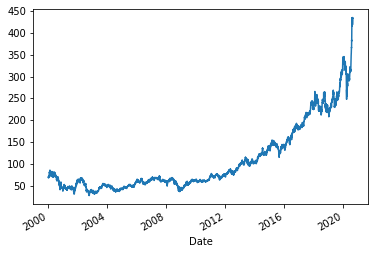

In [114]:
stocks['2330.TW'].plot(kind = 'line')

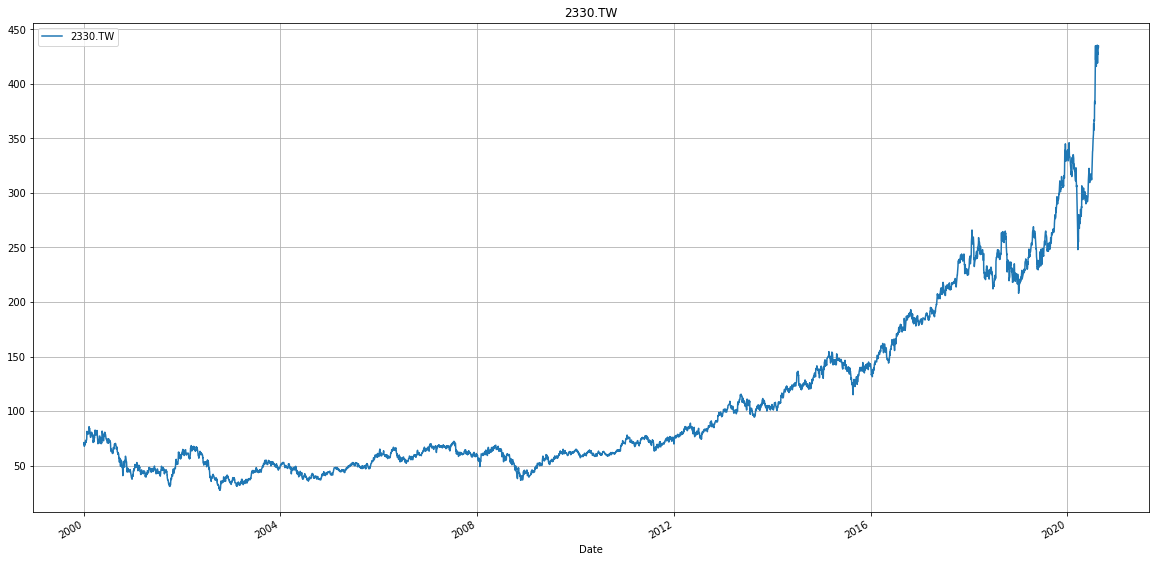

In [118]:
stocks['2330.TW'].plot(kind = 'line', grid = True, figsize = [20,10], legend = True, title = '2330.TW')

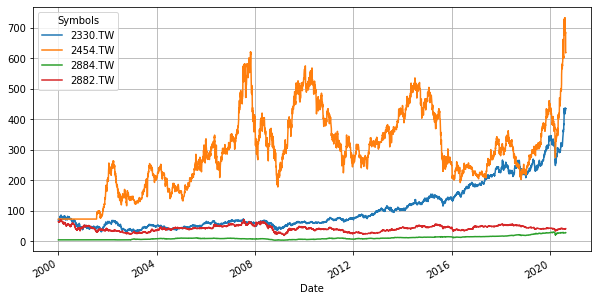

In [119]:
stocks[['2330.TW','2454.TW', '2884.TW', '2882.TW']].plot(kind='line',
figsize=[10,5], legend=True, grid=True)

In [122]:
stocks['ma30'] = stocks['2330.TW'].rolling(window=30).mean()

In [125]:
stocks['ma300'] = stocks['2330.TW'].rolling(window=300).mean()

In [123]:
stocks.head()

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW,ma30
Date,,,,,,
2000-01-04,8756.549805,69.649002,72.471001,4.39724,63.844700,NaN
2000-01-05,8849.870117,71.214104,72.471001,4.39724,62.856701,NaN
2000-01-06,8922.030273,69.649002,72.471001,4.39724,63.844700,NaN
2000-01-07,8849.870117,67.692497,72.471001,4.39724,63.517399,NaN
2000-01-10,9102.599609,70.040199,72.471001,4.39724,63.189999,NaN


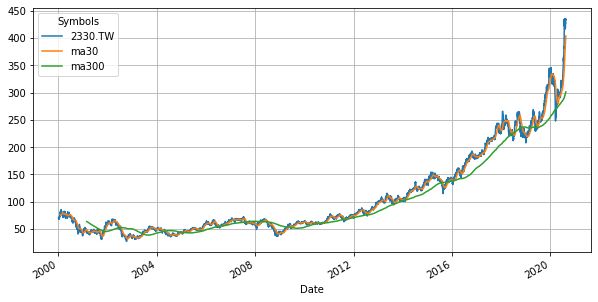

In [126]:
stocks[['2330.TW','ma30', 'ma300']].plot(kind='line',
figsize=[10,5], legend=True, grid=True)

In [129]:
(stocks['2330.TW'] - stocks['2330.TW'].shift(1)) / stocks['2330.TW'].shift(1)

Date
2000-01-04         NaN
2000-01-05    0.022471
2000-01-06   -0.021977
2000-01-07   -0.028091
2000-01-10    0.034682
                ...   
2020-08-13    0.023866
2020-08-14   -0.004662
2020-08-17    0.018735
2020-08-18   -0.004598
2020-08-19    0.003464
Name: 2330.TW, Length: 5164, dtype: float64

In [131]:
stocks['ret'] = stocks['2330.TW'].pct_change(1)

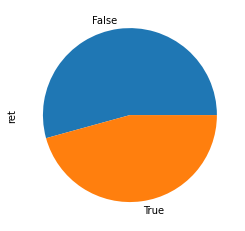

In [136]:
(stocks['ret'] > 0).value_counts().plot(kind = 'pie')

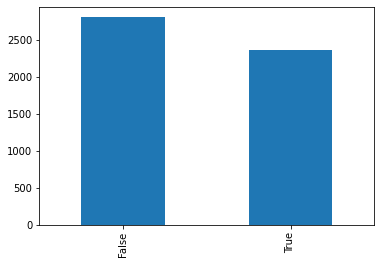

In [137]:
(stocks['ret'] > 0).value_counts().plot(kind = 'bar')

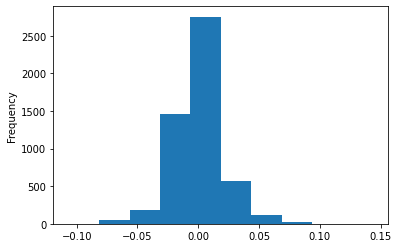

In [138]:
stocks['ret'].plot(kind = 'hist')

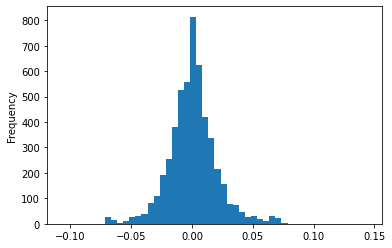

In [139]:
stocks['ret'].plot(kind = 'hist', bins =50)

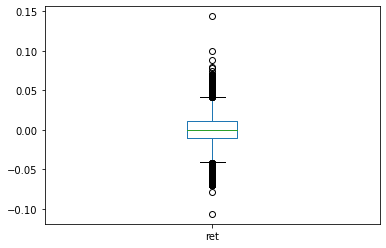

In [140]:
stocks['ret'].plot(kind = 'box')

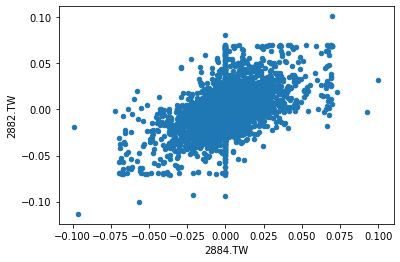

In [141]:
rets = stocks[['2884.TW', '2882.TW']].pct_change(1)
rets.plot(kind='scatter', x='2884.TW', y= '2882.TW')

In [142]:
rets = stocks[['^TWII','2330.TW','2454.TW', '2884.TW', '2882.TW']].pct_change(1)
rets.head()


Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
Date,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.010657,0.022471,0.0,0.0,-0.015475
2000-01-06,0.008154,-0.021977,0.0,0.0,0.015718
2000-01-07,-0.008088,-0.028091,0.0,0.0,-0.005127
2000-01-10,0.028557,0.034682,0.0,0.0,-0.005154


In [143]:
corr = rets.corr()

In [144]:
corr

Symbols,^TWII,2330.TW,2454.TW,2884.TW,2882.TW
Symbols,,,,,
^TWII,1.000000,0.748391,0.460092,0.545600,0.660046
2330.TW,0.748391,1.000000,0.359622,0.360308,0.434757
2454.TW,0.460092,0.359622,1.000000,0.282936,0.303584
2884.TW,0.545600,0.360308,0.282936,1.000000,0.526983
2882.TW,0.660046,0.434757,0.303584,0.526983,1.000000


([<matplotlib.axis.YTick at 0x7f64d5fc5908>,
 [Text(0, 0, '^TWII'),
  Text(0, 0, '2330.TW'),
  Text(0, 0, '2454.TW'),
  Text(0, 0, '2884.TW'),
  Text(0, 0, '2882.TW')])

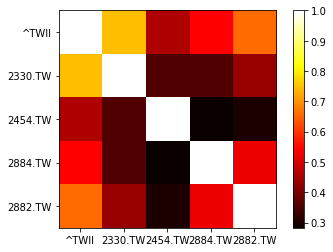

In [145]:
from matplotlib import pyplot as plt
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

In [146]:
rets.mean()

Symbols
^TWII      0.000163
2330.TW    0.000554
2454.TW    0.000737
2884.TW    0.000493
2882.TW    0.000109
dtype: float64

In [147]:
rets.std()

Symbols
^TWII      0.013256
2330.TW    0.020003
2454.TW    0.025471
2884.TW    0.016513
2882.TW    0.019785
dtype: float64

Text(0, 0.5, 'Risk')

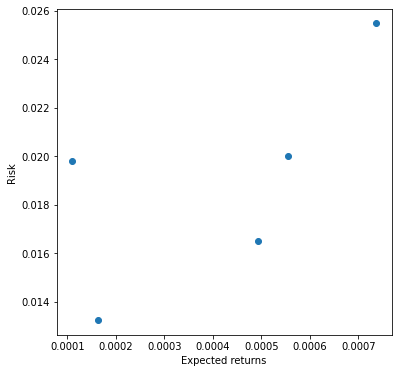

In [148]:
# make a plot with size 6 * 6
plt.figure(figsize=(6,6))
# scatter plot
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')


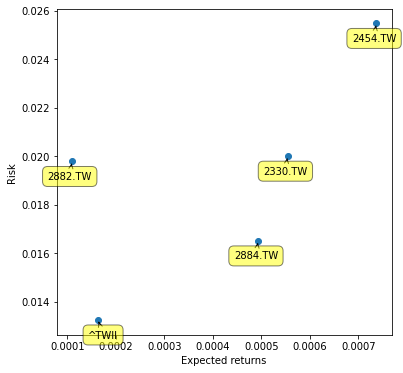

In [149]:
# make a plot with size 6 * 6
plt.figure(figsize=(6,6))
# scatter plot
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(
    label,
    xy = (x, y), xytext = (20, -20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [150]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/esunpy/master/data/purchase.csv')

In [151]:
df.head()

,Unnamed: 0,Time,Action,User,Product,Quantity,Price
0,0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [155]:
# select product, sum(quantity * price) from df group by product
df['total_price'] = df['Quantity'] * df['Price'] 
df.groupby('Product')['total_price'].sum().sort_values(ascending=False).head(10)

Product
P0006584093    3520000.0
P0000143511    1316664.0
P0007082051     892800.0
P0005772981     772395.0
P0014252066     744132.0
P0004607050     655866.0
P0024239865     648762.0
P0006323656     628320.0
P0004134266     586490.0
P0003425855     579230.0
Name: total_price, dtype: float64

In [163]:
!pip install youtube-dl

     |████████████████████████████████| 1.8MB 2.7MB/s 


In [165]:
! youtube-dl -f mp4  https://www.youtube.com/watch?v=jbkSRLYSojo

[youtube] jbkSRLYSojo: Downloading webpage
[download] Destination: Hans Rosling's 200 Countries, 200 Years, 4 Minutes - The Joy of Stats - BBC Four-jbkSRLYSojo.mp4
[download] 100% of 13.74MiB in 00:00


## EDA

In [168]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/esunpy/master/data/Churn_Modelling.csv')

In [169]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [170]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [172]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [174]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [175]:
df.isna().sum().sum()

0

In [176]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [177]:
df.drop(["RowNumber","CustomerId", "Surname"], axis = 1,inplace=True)

In [178]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
exited = df['Exited'].value_counts()

In [183]:
?exited.plot()

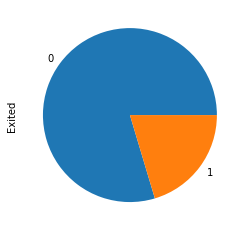

In [184]:
exited.plot(kind = 'pie')

In [186]:
exited.index = ['no exit', 'exit']

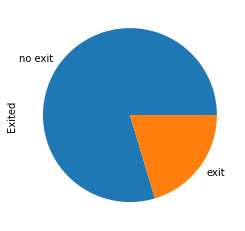

In [187]:
exited.plot(kind = 'pie')

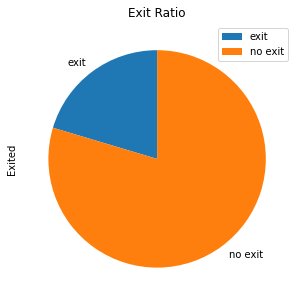

In [189]:
exited.sort_values(inplace = True)
exited.plot(kind = 'pie', title = 'Exit Ratio', figsize=[5,5], counterclock=True,
startangle=90, legend=True)

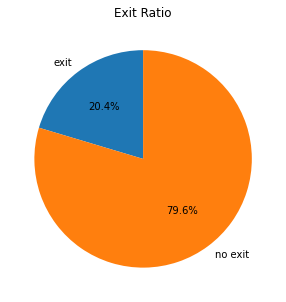

In [190]:
fig1, ax1 = plt.subplots(figsize=(5, 5))

ax1.pie(exited, labels=exited.index, autopct='%1.1f%%',startangle=90)

plt.title("Exit Ratio")
plt.show()


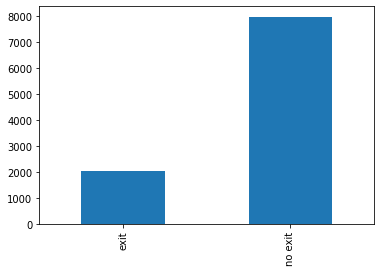

In [191]:
exited.plot(kind = 'bar')

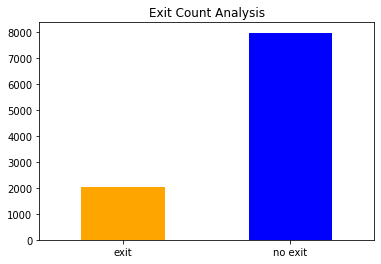

In [192]:
exited.plot(kind = 'bar', rot= 0, color= ['orange', 'blue'],
title = 'Exit Count Analysis')


<BarContainer object of 2 artists>

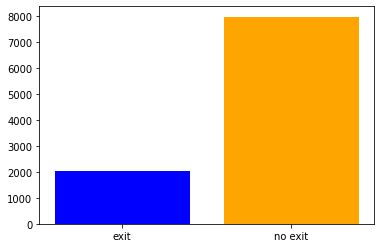

In [193]:
plt.bar(x = exited.index, height = exited, color = ['blue', 'orange'])

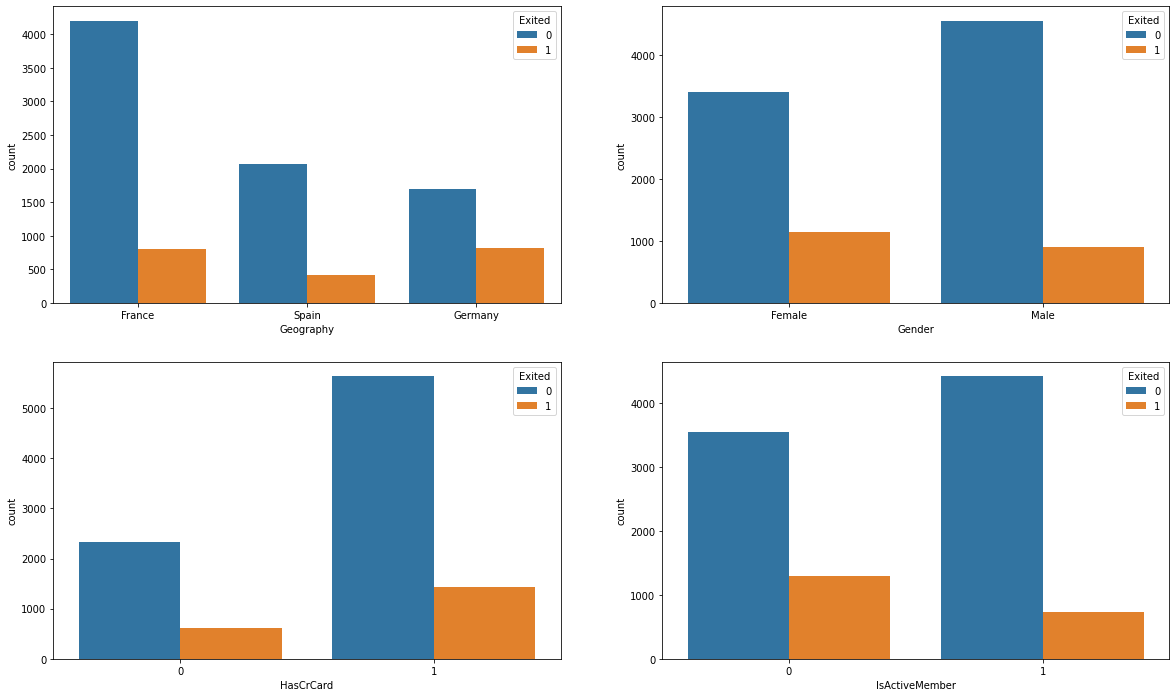

In [194]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

Text(0.5, 1.0, 'Estimated Salary with Age')

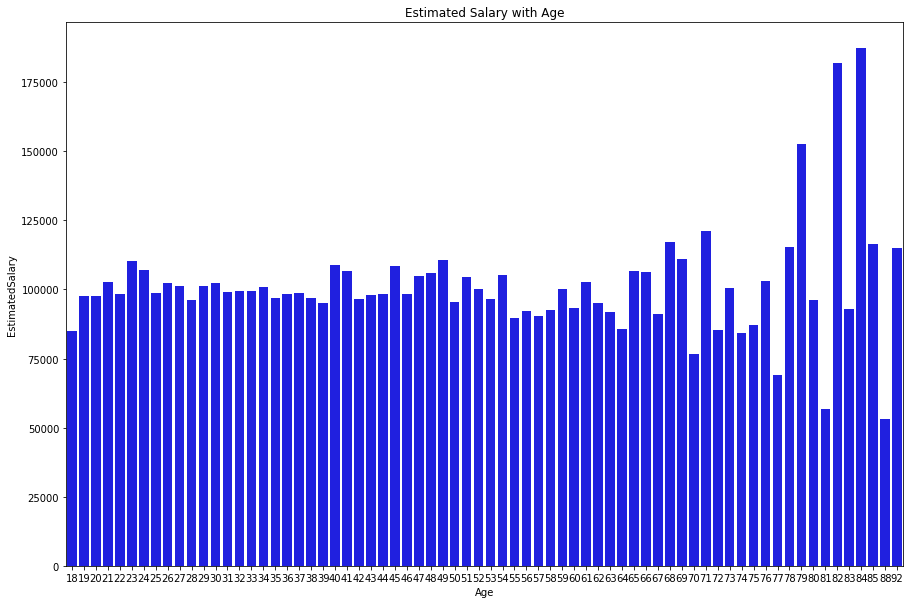

In [195]:
plt.figure(figsize=(15,10))
sns.barplot(x= 'Age',y = 'EstimatedSalary',data = df,color='blue',ci=None)
plt.title('Estimated Salary with Age')

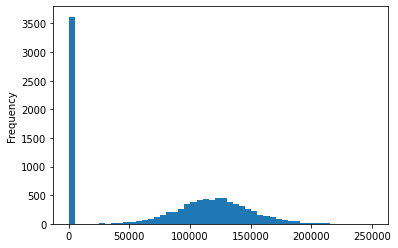

In [197]:
df['Balance'].plot(kind = 'hist', bins = 50)

(array([3.618e+03, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        5.000e+00, 1.300e+01, 2.200e+01, 2.300e+01, 3.000e+01, 5.200e+01,
        7.500e+01, 8.200e+01, 1.210e+02, 1.600e+02, 2.030e+02, 2.020e+02,
        2.570e+02, 3.510e+02, 3.780e+02, 4.110e+02, 4.250e+02, 4.100e+02,
        4.570e+02, 4.470e+02, 3.750e+02, 3.540e+02, 3.050e+02, 2.660e+02,
        2.280e+02, 1.520e+02, 1.390e+02, 1.260e+02, 8.400e+01, 6.800e+01,
        4.400e+01, 4.500e+01, 1.600e+01, 1.300e+01, 9.000e+00, 1.100e+01,
        7.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.    ,   5017.9618,  10035.9236,  15053.8854,  20071.8472,
         25089.809 ,  30107.7708,  35125.7326,  40143.6944,  45161.6562,
         50179.618 ,  55197.5798,  60215.5416,  65233.5034,  70251.4652,
         75269.427 ,  80287.3888,  85305.3506,  90323.3124,  95341.2742,
        100359.236 , 105377.1978, 110395.1596, 115413.1214, 120431.0832,
        125

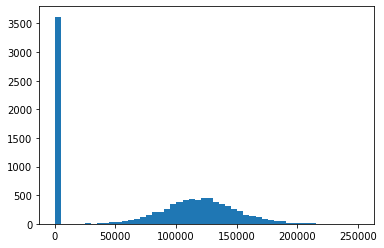

In [198]:
plt.hist(x = df['Balance'], bins = 50)

In [200]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


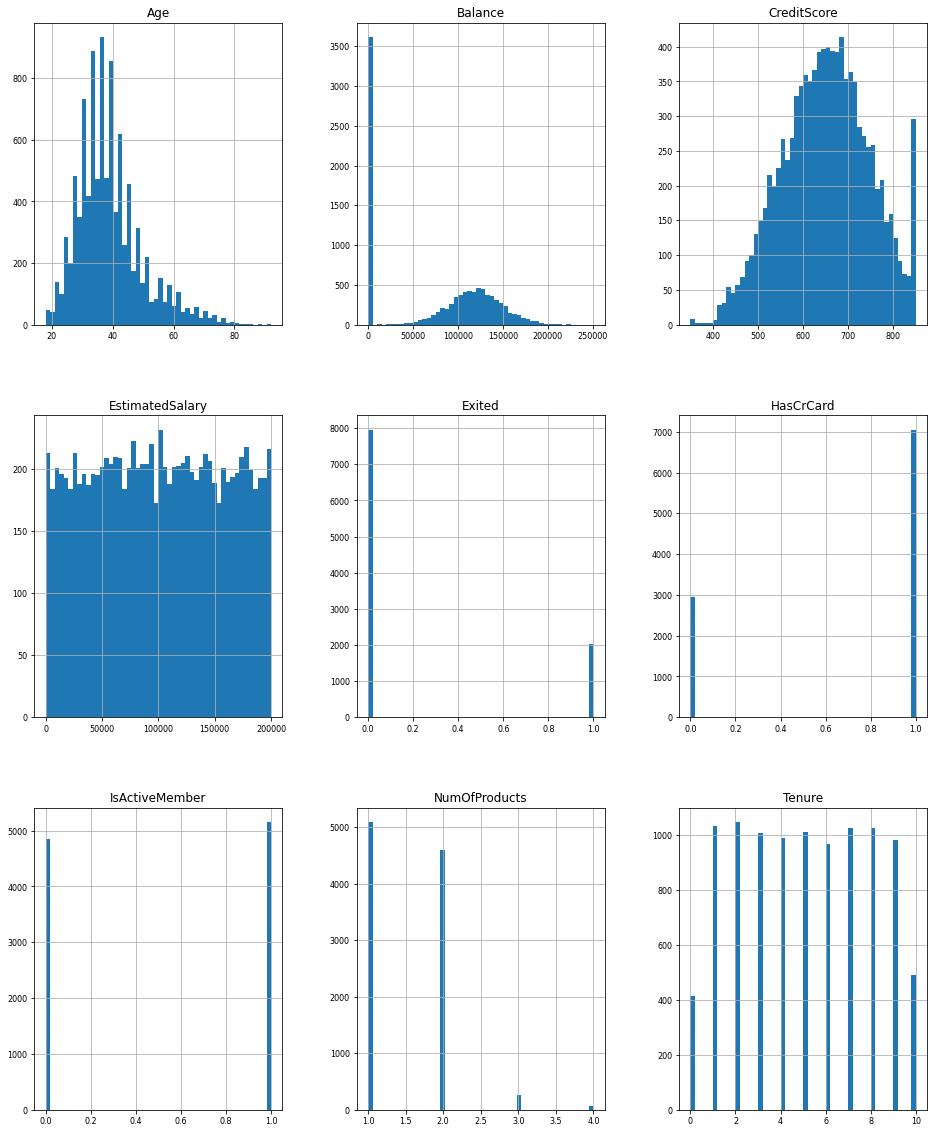

In [201]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [202]:
def distribution(category):
  # 分為Exit, Not Exit
  NonExited=df[df['Exited'] == 0][category]
  Exited=df[df['Exited'] == 1][category]
  #繪製 Histogram
  plt.figure(figsize=(10,6))
  sns.set()
  plt.hist(NonExited,alpha=0.75,bins = 100,label = 'Not Exited',color = "blue",weights=np.ones(len(NonExited)) / len(NonExited))
  plt.hist(Exited,alpha=0.70,bins = 100,label = 'Exited',color = "red",weights=np.ones(len(Exited)) / len(Exited))
  # 設定圖標
  plt.xlabel(category)
  plt.ylabel('Density')
  plt.legend(loc='upper right')
  plt.title('{} Distribution'.format(category))
  plt.show()

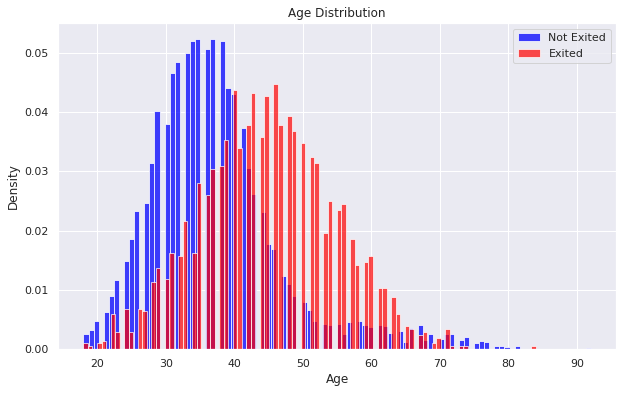

In [203]:
distribution('Age')

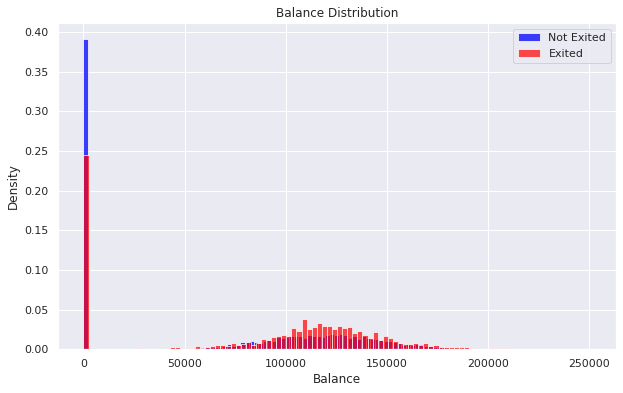

In [204]:
distribution('Balance')

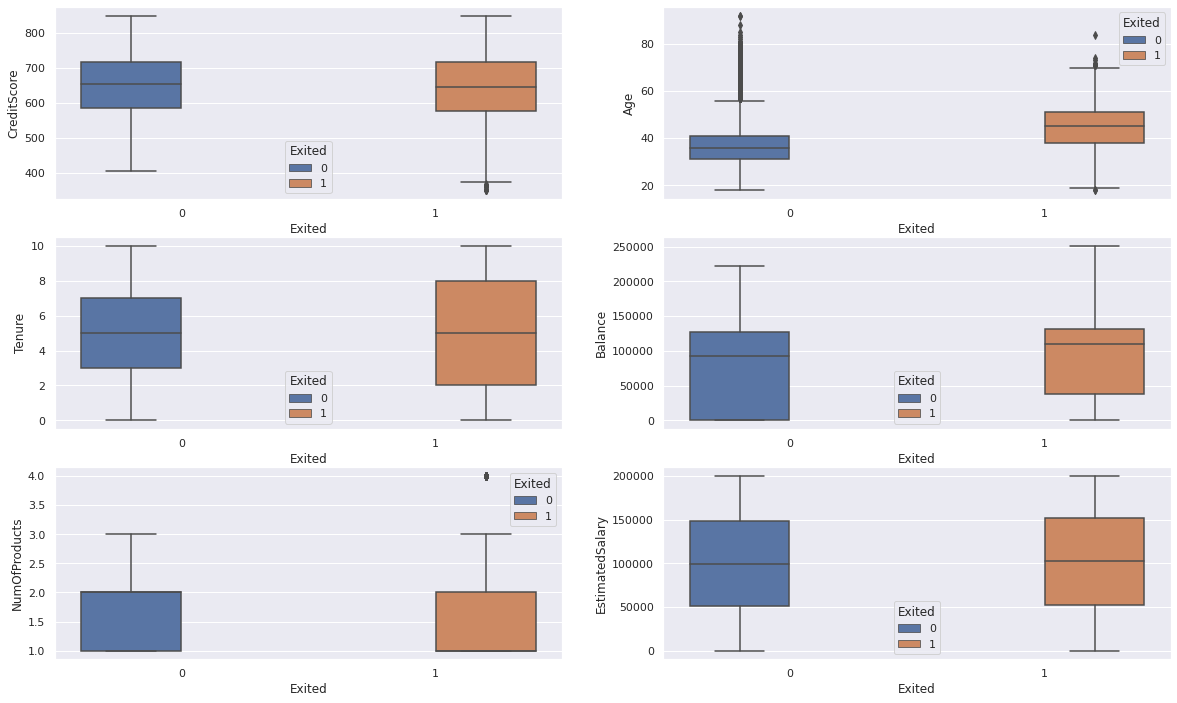

In [205]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore'
,x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts'
,x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary'
,x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


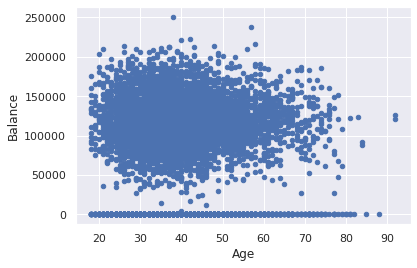

In [206]:
df[['Age', 'Balance']].plot(kind = 'scatter', x = 'Age', y = 'Balance')

Text(0.5, 1.0, 'Age Wise Balance Distribution')

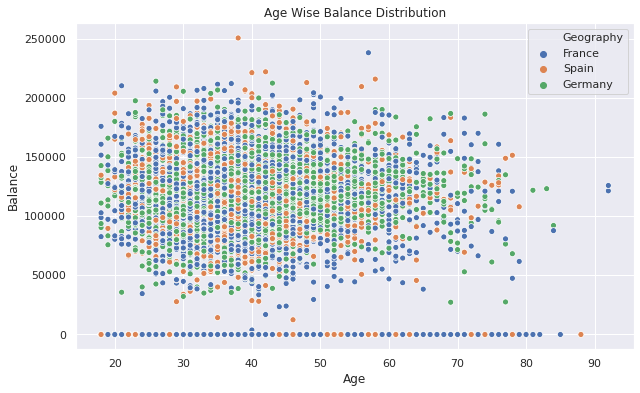

In [207]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Balance",hue = 'Geography',data=df)
plt.title('Age Wise Balance Distribution')

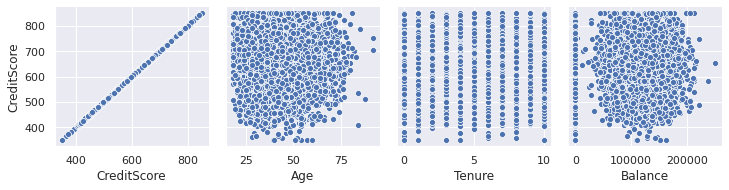

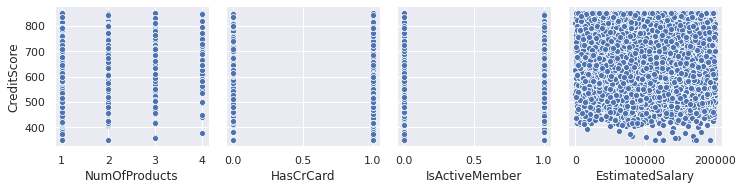

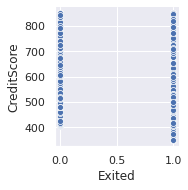

In [208]:
for i in range(0, len(df_num.columns), 4):
  sns.pairplot(data=df_num,
  x_vars=df_num.columns[i:i+4],
  y_vars=['CreditScore'])


In [209]:
df_corr = df_num.corr()
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


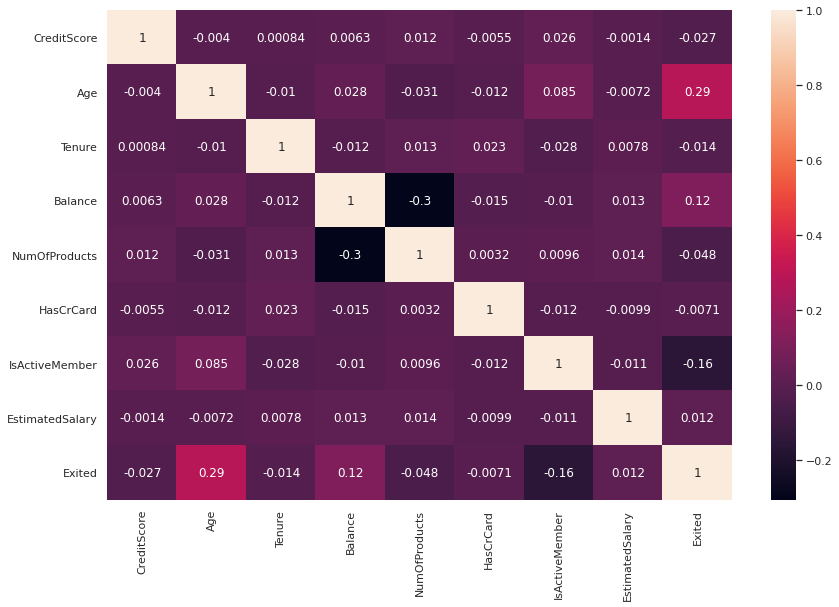

In [210]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(df_corr,
xticklabels=df_corr.columns.values,
yticklabels=df_corr.columns.values,annot= True)
plt.show()
